In [4]:
import tensorflow as tf
import numpy as np

In [5]:
print(tf.__version__)

2.3.0


In [6]:
print(np.__version__)

1.18.5


In [7]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

In [8]:
X

array([1, 2, 3])

In [9]:
Y

array([1, 2, 3])

In [12]:
def cost_func(W,X,Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
        return c / len(X)

# -3 ~ 5 까지 15개의 구간으로 나눈다
for feed_W in np.linspace(-3, 5, num = 15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |    5.33333
-2.429 |    3.91837
-1.857 |    2.72109
-1.286 |    1.74150
-0.714 |    0.97959
-0.143 |    0.43537
 0.429 |    0.10884
 1.000 |    0.00000
 1.571 |    0.10884
 2.143 |    0.43537
 2.714 |    0.97959
 3.286 |    1.74150
 3.857 |    2.72109
 4.429 |    3.91837
 5.000 |    5.33333


In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

In [16]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num = 15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


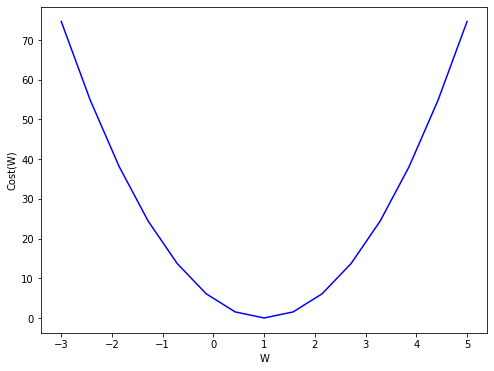

In [17]:
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

In [18]:
#동일한 난수 발생을 위해
tf.random.set_seed(0)

In [21]:
x_data = [1.,2.,3.,4.]
y_data = [1.,3.,5.,7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypo = W * X
    cost = tf.reduce_mean(tf.square(hypo - Y))
    #학습률
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [22]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)
